In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
'''listdata = dataframe.values.tolist()

inputs = []
outputs = []
for i in range(len(listdata)):
    inputs.append(listdata[i][:len(listdata[i])-1])
    #outputs.append([listdata[i][len(listdata[i])-1]])
    outputs.append(listdata[i][len(listdata[i])-1])
    
print(type(inputs[0][0]))
#print(outputs)'''

In [3]:
dataframe = pd.read_csv('/Users/dan-ioanbultoc/downloads/winequality-white.csv', sep = ';')

listdata = dataframe.values

inputs = listdata[:,:-1]
listdata[listdata[:,-1] < 6,-1] = 0
listdata[listdata[:,-1] >= 6,-1] = 1
outputs = listdata[:,-1]

mean = inputs.mean(axis = 0)
inputs = inputs-mean

std = inputs.std(axis = 0)
inputs = inputs/std

#outputs = outputs[outputs]

#meano = outputs.mean(axis = 0)
#outputs = outputs-meano

#stdo = outputs.std(axis = 0)
#outputs = outputs/stdo

In [9]:
print(dataframe)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  

In [ ]:
print(outputs)

In [4]:
train = inputs[:1000, :]
test = inputs[1000:, :]

traino = outputs[:1000]
testo = outputs[1000:]

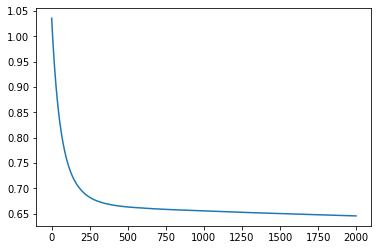

In [12]:
tf.keras.backend.clear_session()

inp = layers.Dense(units = 5, input_dim = len(inputs[0,:]), activation = 'relu')
layer1 = layers.Dense(units = 5, activation = 'relu')
layer2 = layers.Dense(units = 5, activation = 'relu')
out = layers.Dense(units = 1, activation = 'sigmoid')

model = keras.Sequential([inp, layer1, layer2, out])

model.compile(optimizer = keras.optimizers.SGD(0.0001), loss = 'binary_crossentropy')

history = model.fit(x=train, y=traino, epochs = 2000 , verbose = False)
plt.plot(history.history['loss'])
plt.show()

In [13]:
def eff(Inputs, Outputs):
    predictions = model.predict(Inputs)

    predictions[predictions[:,-1] < 0.5,-1] = 0
    predictions[predictions[:,-1] >= 0.5,-1] = 1
    diff = abs(predictions - Outputs)
    eff = sum(diff)[0]/len(diff)
    return 1-eff

print(eff(train, traino))
print(eff(test, testo))

0.975
0.956644433042586


In [11]:
model.predict([test])

array([[0.6078216 ],
       [0.54112434],
       [0.54580826],
       ...,
       [0.671943  ],
       [0.758886  ],
       [0.7649231 ]], dtype=float32)

In [ ]:
print(testo)

In [ ]:
print(type(history))

In [10]:
sum(outputs)/len(outputs)

0.6651694569211923